<a href="https://www.kaggle.com/code/vijays140291/man-of-the-match-prediction?scriptVersionId=137105390" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
import tensorflow as tf
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
import seaborn as sns

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:98: UserWarning: unable to load libtensorflow_io_plugins.so: unable to open file: libtensorflow_io_plugins.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so: undefined symbol: _ZN3tsl6StatusC1EN10tensorflow5error4CodeESt17basic_string_viewIcSt11char_traitsIcEENS_14SourceLocationE']
  warnings.warn(f"unable to load libtensorflow_io_plugins.so: {e}")
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:104: UserWarning: file system plugins are not loaded: unable to open file: l

In [2]:
#loading the dataset
df=pd.read_csv('/kaggle/input/fifa-2018-match-statistics/FIFA 2018 Statistics.csv')
#showing the dataset
df

,Date,Team,Opponent,Goal Scored,Ball Possession %,Attempts,On-Target,Off-Target,Blocked,Corners,...,Yellow Card,Yellow & Red,Red,Man of the Match,1st Goal,Round,PSO,Goals in PSO,Own goals,Own goal Time
0,14-06-2018,Russia,Saudi Arabia,5,40,13,7,3,3,6,...,0,0,0,Yes,12.0,Group Stage,No,0,NaN,NaN
1,14-06-2018,Saudi Arabia,Russia,0,60,6,0,3,3,2,...,0,0,0,No,NaN,Group Stage,No,0,NaN,NaN
2,15-06-2018,Egypt,Uruguay,0,43,8,3,3,2,0,...,2,0,0,No,NaN,Group Stage,No,0,NaN,NaN
3,15-06-2018,Uruguay,Egypt,1,57,14,4,6,4,5,...,0,0,0,Yes,89.0,Group Stage,No,0,NaN,NaN
4,15-06-2018,Morocco,Iran,0,64,13,3,6,4,5,...,1,0,0,No,NaN,Group Stage,No,0,1.0,90.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
123,11-07-2018,England,Croatia,1,46,11,1,6,4,4,...,1,0,0,No,5.0,Semi- Finals,No,0,NaN,NaN
124,14-07-2018,Belgium,England,2,43,12,4,3,5,4,...,1,0,0,Yes,4.0,3rd Place,No,0,NaN,NaN
125,14-07-2018,England,Belgium,0,57,15,5,7,3,5,...,2,0,0,No,NaN,3rd Place,No,0,NaN,NaN
126,15-07-2018,France,Croatia,4,39,8,6,1,1,2,...,2,0,0,Yes,18.0,Final,No,0,1.0,18.0


In [3]:
#getting preliminary information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128 entries, 0 to 127
Data columns (total 27 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Date                    128 non-null    object 
 1   Team                    128 non-null    object 
 2   Opponent                128 non-null    object 
 3   Goal Scored             128 non-null    int64  
 4   Ball Possession %       128 non-null    int64  
 5   Attempts                128 non-null    int64  
 6   On-Target               128 non-null    int64  
 7   Off-Target              128 non-null    int64  
 8   Blocked                 128 non-null    int64  
 9   Corners                 128 non-null    int64  
 10  Offsides                128 non-null    int64  
 11  Free Kicks              128 non-null    int64  
 12  Saves                   128 non-null    int64  
 13  Pass Accuracy %         128 non-null    int64  
 14  Passes                  128 non-null    in

In [4]:
#checking for null values in the dataset
df.isna().sum()

Date                        0
Team                        0
Opponent                    0
Goal Scored                 0
Ball Possession %           0
Attempts                    0
On-Target                   0
Off-Target                  0
Blocked                     0
Corners                     0
Offsides                    0
Free Kicks                  0
Saves                       0
Pass Accuracy %             0
Passes                      0
Distance Covered (Kms)      0
Fouls Committed             0
Yellow Card                 0
Yellow & Red                0
Red                         0
Man of the Match            0
1st Goal                   34
Round                       0
PSO                         0
Goals in PSO                0
Own goals                 116
Own goal Time             116
dtype: int64

In [5]:
#dropping the date column from the dataset as it is not providing any useful information
df=df.drop(['Date','Own goals','Own goal Time'],axis=1)

In [6]:
#Dealing with missing values

df['1st Goal']=df['1st Goal'].fillna(df['1st Goal'].mean())

In [7]:
df.isna().sum()

Team                      0
Opponent                  0
Goal Scored               0
Ball Possession %         0
Attempts                  0
On-Target                 0
Off-Target                0
Blocked                   0
Corners                   0
Offsides                  0
Free Kicks                0
Saves                     0
Pass Accuracy %           0
Passes                    0
Distance Covered (Kms)    0
Fouls Committed           0
Yellow Card               0
Yellow & Red              0
Red                       0
Man of the Match          0
1st Goal                  0
Round                     0
PSO                       0
Goals in PSO              0
dtype: int64

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128 entries, 0 to 127
Data columns (total 24 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Team                    128 non-null    object 
 1   Opponent                128 non-null    object 
 2   Goal Scored             128 non-null    int64  
 3   Ball Possession %       128 non-null    int64  
 4   Attempts                128 non-null    int64  
 5   On-Target               128 non-null    int64  
 6   Off-Target              128 non-null    int64  
 7   Blocked                 128 non-null    int64  
 8   Corners                 128 non-null    int64  
 9   Offsides                128 non-null    int64  
 10  Free Kicks              128 non-null    int64  
 11  Saves                   128 non-null    int64  
 12  Pass Accuracy %         128 non-null    int64  
 13  Passes                  128 non-null    int64  
 14  Distance Covered (Kms)  128 non-null    in

In [9]:
#checking for unique value in each object column
{column:[df[column].unique()] for column in df.columns if df[column].dtypes=='object'}

{'Team': [array(['Russia', 'Saudi Arabia', 'Egypt', 'Uruguay', 'Morocco', 'Iran',
         'Portugal', 'Spain', 'France', 'Australia', 'Argentina', 'Iceland',
         'Peru', 'Denmark', 'Croatia', 'Nigeria', 'Costa Rica', 'Serbia',
         'Germany', 'Mexico', 'Brazil', 'Switzerland', 'Sweden',
         'Korea Republic', 'Belgium', 'Panama', 'Tunisia', 'England',
         'Colombia', 'Japan', 'Poland', 'Senegal'], dtype=object)],
 'Opponent': [array(['Saudi Arabia', 'Russia', 'Uruguay', 'Egypt', 'Iran', 'Morocco',
         'Spain', 'Portugal', 'Australia', 'France', 'Iceland', 'Argentina',
         'Denmark', 'Peru', 'Nigeria', 'Croatia', 'Serbia', 'Costa Rica',
         'Mexico', 'Germany', 'Switzerland', 'Brazil', 'Korea Republic',
         'Sweden', 'Panama', 'Belgium', 'England', 'Tunisia', 'Japan',
         'Colombia', 'Senegal', 'Poland'], dtype=object)],
 'Man of the Match': [array(['Yes', 'No'], dtype=object)],
 'Round': [array(['Group Stage', 'Round of 16', 'Quarter Finals',

In [10]:
#Label Encoder
label_encoder=LabelEncoder()
label_encoder.fit_transform(df['Man of the Match'])

array([1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0,
       1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0,
       0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0,
       0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0])

In [11]:
{index:label for index,label in enumerate(label_encoder.classes_)}

{0: 'No', 1: 'Yes'}

In [12]:
df['Man of the Match']=label_encoder.fit_transform(df['Man of the Match'])
df['PSO']=label_encoder.fit_transform(df['PSO'])



In [13]:
round_values=list(df['Round'].unique())
round_values={label:index for index,label in enumerate(round_values)}
print(round_values)

{'Group Stage': 0, 'Round of 16': 1, 'Quarter Finals': 2, 'Semi- Finals': 3, '3rd Place': 4, 'Final': 5}


In [14]:
df['Round']=df['Round'].apply(lambda x:round_values[x])

In [15]:
df

,Team,Opponent,Goal Scored,Ball Possession %,Attempts,On-Target,Off-Target,Blocked,Corners,Offsides,...,Distance Covered (Kms),Fouls Committed,Yellow Card,Yellow & Red,Red,Man of the Match,1st Goal,Round,PSO,Goals in PSO
0,Russia,Saudi Arabia,5,40,13,7,3,3,6,3,...,118,22,0,0,0,1,12.000000,0,0,0
1,Saudi Arabia,Russia,0,60,6,0,3,3,2,1,...,105,10,0,0,0,0,39.457447,0,0,0
2,Egypt,Uruguay,0,43,8,3,3,2,0,1,...,112,12,2,0,0,0,39.457447,0,0,0
3,Uruguay,Egypt,1,57,14,4,6,4,5,1,...,111,6,0,0,0,1,89.000000,0,0,0
4,Morocco,Iran,0,64,13,3,6,4,5,0,...,101,22,1,0,0,0,39.457447,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
123,England,Croatia,1,46,11,1,6,4,4,3,...,148,14,1,0,0,0,5.000000,3,0,0
124,Belgium,England,2,43,12,4,3,5,4,1,...,108,11,1,0,0,1,4.000000,4,0,0
125,England,Belgium,0,57,15,5,7,3,5,0,...,110,5,2,0,0,0,39.457447,4,0,0
126,France,Croatia,4,39,8,6,1,1,2,1,...,99,14,2,0,0,1,18.000000,5,0,0


In [16]:
def onehot_encoding(df,column):
    df=df.copy()
    dummies=pd.get_dummies(df[column],prefix=column)
    df=pd.concat([df,dummies],axis=1)
    df=df.drop(column,axis=1)
    return df

In [17]:
for column in [column for column in df.columns if df[column].dtypes=='object']:
    df=onehot_encoding(df,column)
df

,Goal Scored,Ball Possession %,Attempts,On-Target,Off-Target,Blocked,Corners,Offsides,Free Kicks,Saves,...,Opponent_Portugal,Opponent_Russia,Opponent_Saudi Arabia,Opponent_Senegal,Opponent_Serbia,Opponent_Spain,Opponent_Sweden,Opponent_Switzerland,Opponent_Tunisia,Opponent_Uruguay
0,5,40,13,7,3,3,6,3,11,0,...,0,0,1,0,0,0,0,0,0,0
1,0,60,6,0,3,3,2,1,25,2,...,0,1,0,0,0,0,0,0,0,0
2,0,43,8,3,3,2,0,1,7,3,...,0,0,0,0,0,0,0,0,0,1
3,1,57,14,4,6,4,5,1,13,3,...,0,0,0,0,0,0,0,0,0,0
4,0,64,13,3,6,4,5,0,14,2,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
123,1,46,11,1,6,4,4,3,24,5,...,0,0,0,0,0,0,0,0,0,0
124,2,43,12,4,3,5,4,1,5,5,...,0,0,0,0,0,0,0,0,0,0
125,0,57,15,5,7,3,5,0,12,2,...,0,0,0,0,0,0,0,0,0,0
126,4,39,8,6,1,1,2,1,14,1,...,0,0,0,0,0,0,0,0,0,0


In [18]:
#splitting the data between target and features
y=df['Man of the Match']
x=df.drop('Man of the Match',axis=1)

In [19]:
#train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.7)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(89, 85)
(39, 85)
(89,)
(39,)


In [20]:
x_train

,Goal Scored,Ball Possession %,Attempts,On-Target,Off-Target,Blocked,Corners,Offsides,Free Kicks,Saves,...,Opponent_Portugal,Opponent_Russia,Opponent_Saudi Arabia,Opponent_Senegal,Opponent_Serbia,Opponent_Spain,Opponent_Sweden,Opponent_Switzerland,Opponent_Tunisia,Opponent_Uruguay
81,0,70,26,6,11,9,9,1,16,3,...,0,0,0,0,0,0,0,0,0,0
26,1,41,6,1,3,2,2,2,11,5,...,0,0,0,0,0,0,0,0,0,0
7,3,61,12,5,5,2,5,3,13,0,...,1,0,0,0,0,0,0,0,0,0
124,2,43,12,4,3,5,4,1,5,5,...,0,0,0,0,0,0,0,0,0,0
119,2,62,17,3,10,4,8,0,26,5,...,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113,2,58,11,2,7,2,3,0,17,4,...,0,0,0,0,0,0,0,0,0,1
88,0,54,10,3,4,3,5,1,8,2,...,0,0,0,0,0,0,0,0,0,0
122,2,54,22,7,11,4,8,1,17,0,...,0,0,0,0,0,0,0,0,0,0
5,1,36,8,2,5,1,2,0,22,2,...,0,0,0,0,0,0,0,0,0,0


In [21]:
#scaling the dataset
scaler=StandardScaler()
scaler.fit(x_train)
x_train=pd.DataFrame(scaler.transform(x_train),columns=x_train.columns)
x_test=pd.DataFrame(scaler.transform(x_test),columns=x_test.columns)

In [22]:
x_test

,Goal Scored,Ball Possession %,Attempts,On-Target,Off-Target,Blocked,Corners,Offsides,Free Kicks,Saves,...,Opponent_Portugal,Opponent_Russia,Opponent_Saudi Arabia,Opponent_Senegal,Opponent_Serbia,Opponent_Spain,Opponent_Sweden,Opponent_Switzerland,Opponent_Tunisia,Opponent_Uruguay
0,0.503509,-0.169409,0.395854,0.399047,0.235015,0.268060,-1.177908,1.227455,0.076097,1.557152,...,-0.106600,-0.186772,-0.186772,-0.151620,-0.151620,-0.21693,-0.186772,-0.151620,-0.186772,-0.216930
1,-0.326348,1.929978,0.778799,-0.467177,0.235015,2.003139,0.453747,-0.355784,0.275293,-1.370733,...,-0.106600,-0.186772,-0.186772,-0.151620,-0.151620,-0.21693,-0.186772,-0.151620,-0.186772,-0.216930
2,-1.156205,-0.741969,-0.561510,-0.467177,0.235015,-1.033249,0.045833,-1.147404,-0.919880,-0.394771,...,-0.106600,-0.186772,-0.186772,-0.151620,-0.151620,-0.21693,-0.186772,-0.151620,-0.186772,-0.216930
3,-0.326348,2.407111,2.310581,2.131494,0.235015,2.870679,0.453747,-0.355784,1.072074,-1.370733,...,-0.106600,5.354126,-0.186772,-0.151620,-0.151620,-0.21693,-0.186772,-0.151620,-0.186772,-0.216930
4,-1.156205,-0.646543,-0.944455,-0.467177,-0.554281,-1.033249,-1.585822,1.227455,0.673683,-0.882752,...,-0.106600,-0.186772,-0.186772,-0.151620,-0.151620,-0.21693,-0.186772,-0.151620,-0.186772,-0.216930
5,-0.326348,-0.169409,-1.327401,-0.900289,-0.554281,-1.467019,-1.177908,-1.147404,-0.322294,0.093210,...,-0.106600,-0.186772,-0.186772,-0.151620,-0.151620,-0.21693,-0.186772,-0.151620,-0.186772,-0.216930
6,-1.156205,0.975711,2.310581,2.131494,1.418961,1.569369,1.269574,-0.355784,0.474488,0.093210,...,-0.106600,-0.186772,-0.186772,-0.151620,-0.151620,-0.21693,-0.186772,-0.151620,-0.186772,-0.216930
7,-1.156205,-0.551116,-1.901819,-1.333400,-1.738227,-1.033249,-1.177908,0.435835,0.474488,1.069172,...,-0.106600,-0.186772,-0.186772,-0.151620,-0.151620,-0.21693,-0.186772,-0.151620,-0.186772,4.609772
8,-0.326348,-1.696236,-0.944455,-0.900289,-0.159633,-1.033249,-1.585822,-0.355784,-0.521489,0.093210,...,9.380832,-0.186772,-0.186772,-0.151620,-0.151620,-0.21693,-0.186772,-0.151620,-0.186772,-0.216930
9,-0.326348,-0.169409,0.204381,-0.034065,0.629664,-0.165710,-1.177908,-0.355784,0.076097,-0.882752,...,-0.106600,-0.186772,-0.186772,-0.151620,-0.151620,-0.21693,-0.186772,-0.151620,-0.186772,-0.216930


In [23]:
#training the Model
x_train.shape

(89, 85)

In [24]:
len(x_train.columns)

85

In [25]:
#Neural Network Model
sk_model=MLPClassifier(hidden_layer_sizes=(32,32))
sk_model.fit(x_train,y_train)

MLPClassifier(hidden_layer_sizes=(32, 32))

In [26]:
sk_model.score(x_test,y_test)

0.5641025641025641

In [27]:
#Tensorflow
inputs=tf.keras.Input(shape=(85,))
x=tf.keras.layers.Dense(32,activation='relu')(inputs)
x=tf.keras.layers.Dense(32,activation='relu')(x)
outputs=tf.keras.layers.Dense(1,activation='sigmoid')(x)

tf_model=tf.keras.Model(inputs=inputs,outputs=outputs)



In [28]:
tf_model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [29]:
tf_model.fit(x_train,y_train,batch_size=32,epochs=200,validation_split=0.2)

Epoch 1/200
3/3 [==============================] - 1s 137ms/step - loss: 0.7469 - accuracy: 0.5070 - val_loss: 0.6210 - val_accuracy: 0.5000
Epoch 2/200
3/3 [==============================] - 0s 19ms/step - loss: 0.7014 - accuracy: 0.5634 - val_loss: 0.6215 - val_accuracy: 0.5556
Epoch 3/200
3/3 [==============================] - 0s 19ms/step - loss: 0.6688 - accuracy: 0.5915 - val_loss: 0.6207 - val_accuracy: 0.5556
Epoch 4/200
3/3 [==============================] - 0s 19ms/step - loss: 0.6393 - accuracy: 0.6056 - val_loss: 0.6195 - val_accuracy: 0.5556
Epoch 5/200
3/3 [==============================] - 0s 19ms/step - loss: 0.6124 - accuracy: 0.6197 - val_loss: 0.6186 - val_accuracy: 0.5556
Epoch 6/200
3/3 [==============================] - 0s 20ms/step - loss: 0.5890 - accuracy: 0.6479 - val_loss: 0.6176 - val_accuracy: 0.5556
Epoch 7/200
3/3 [==============================] - 0s 18ms/step - loss: 0.5683 - accuracy: 0.7183 - val_loss: 0.6178 - val_accuracy: 0.5556
Epoch 8/200
3/3 [==

In [30]:
print(tf_model.evaluate(x_test,y_test,verbose=False))

[1.1257716417312622, 0.7435897588729858]


In [31]:
y_pred=(np.squeeze(tf_model.predict(x_test))>0.5).astype(np.int)

2/2 [==============================] - 0s 4ms/step


/tmp/ipykernel_20/3617668078.py:1: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y_pred=(np.squeeze(tf_model.predict(x_test))>0.5).astype(np.int)


In [32]:
print(y_pred)

[0 0 1 1 1 0 1 1 0 0 1 1 1 1 1 1 0 0 0 1 1 0 1 0 1 1 0 0 1 0 0 0 1 0 0 0 0
 0 0]


In [33]:
y_test

53     0
39     1
49     0
100    0
90     0
21     0
18     1
65     0
70     0
110    0
85     1
32     1
34     1
76     0
75     1
63     1
107    0
60     0
127    0
77     1
95     1
73     1
98     1
35     0
29     1
115    1
33     0
121    0
96     1
15     0
71     1
23     0
108    1
84     0
22     1
109    0
87     0
47     0
102    1
Name: Man of the Match, dtype: int64

In [34]:
print(x_test.shape)

(39, 85)


In [35]:
cm=confusion_matrix(y_test,y_pred)


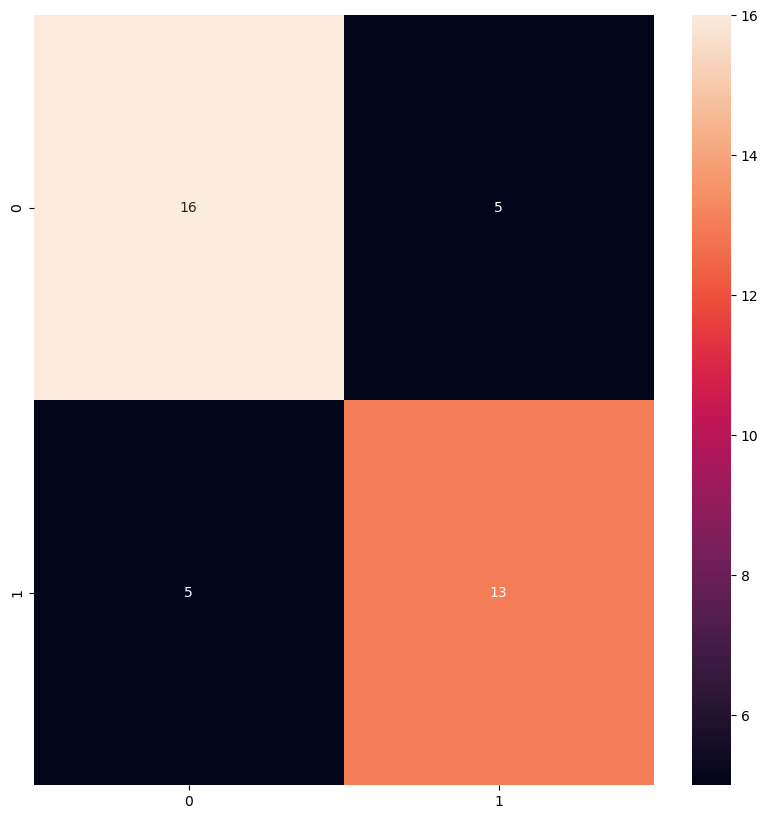

In [36]:
# Tensor Flow Confusion Matrix
plt.figure(figsize=(10,10))
sns.heatmap(cm,annot=True)
plt.show()

In [37]:
sk_pred=sk_model.predict(x_test)

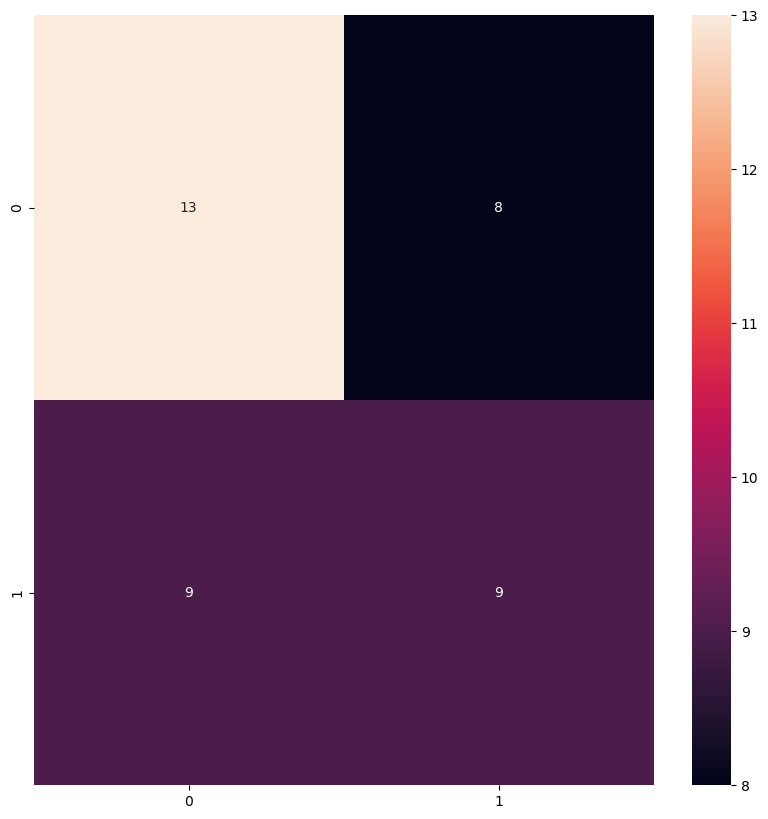

In [38]:
#MLP Classifier Confusion Matrix
sk_cm=confusion_matrix(y_test,sk_pred)
plt.figure(figsize=(10,10))
sns.heatmap(sk_cm,annot=True)
plt.show()